In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from src import process_data, train_to_implicit

%load_ext autoreload
%autoreload 2

In [2]:
train_data = pd.read_csv("data/train_images.csv")
class_names =  np.load("data/class_names.npy", allow_pickle=True)

In [3]:
class_names = {v: k.split(".")[-1] for k, v in class_names.item().items()}

## Get Class Distribution

C:\Users\Oliver\AppData\Local\Temp\ipykernel_17936\2030293505.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names.values(), rotation=60)


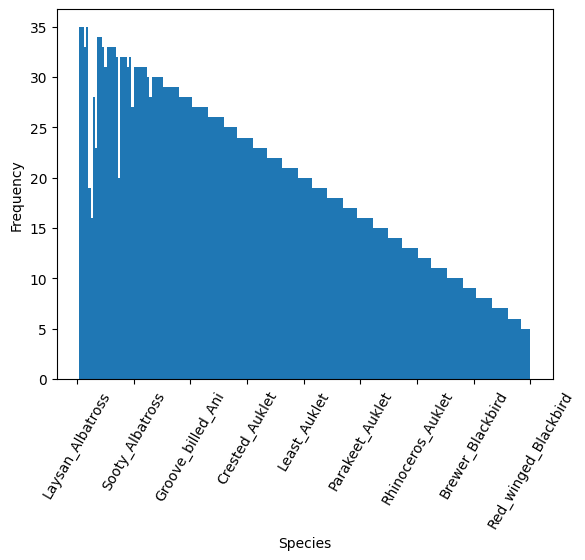

In [4]:
fig, ax = plt.subplots(1,1)
ax.hist(train_data.label, bins=len(class_names))
ax.set_ylabel("Frequency")
ax.set_xlabel("Species")
ax.set_xticklabels(class_names.values(), rotation=60)

plt.show()

In [5]:
train_data["label"].value_counts()

label
1      35
4      35
2      35
9      34
10     34
       ..
196     6
197     5
198     5
199     5
200     5
Name: count, Length: 200, dtype: int64

## Check Image Properties

In [6]:
widths = []
heights = []

for img in os.listdir("data/train_images/train_images"):
    im = Image.open(os.path.join("data/train_images/train_images", img))
    widths.append(im.size[0])
    heights.append(im.size[1])

AVG_HEIGHT = round(sum(heights)/len(heights))
AVG_WIDTH = round(sum(widths)/len(widths))

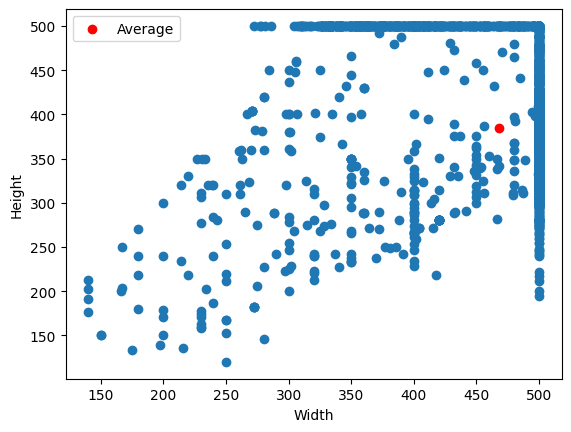

In [7]:
plt.scatter(widths, heights)
plt.scatter(AVG_WIDTH, AVG_HEIGHT, color="r", label="Average")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend()
plt.show()

## Process Data

In [15]:
train_to_implicit("data/train_images/train_images", train_data)

In [21]:
train_data[train_data["image_path"].str.contains("999.jpg")]

,image_path,label
998,/train_images/999.jpg,33
1998,/train_images/1999.jpg,70
2998,/train_images/2999.jpg,118
